In [315]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageOps
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [316]:
work_dir = "/Users/elijahkeck/Downloads/happy-whale-and-dolphin/"

In [317]:
train_df = pd.read_csv(work_dir+ 'train.csv', usecols=['image', 'species'])

In [318]:
def load_all_data(X_train, X_test, labels_train, w, max_photo):
    for set in ["train", "test"]:
        count = 0
        image_dir = work_dir+ set+ "_images"
        files = glob.glob(image_dir+ "/*.jpg")
        for f in files[:max_photo]:
            count +=1
            print(set, " file ", count, " loading.")
            img = Image.open(f)
            img = ImageOps.autocontrast(img)
            #img = ImageOps.grayscale(img)
            #img = ImageOps.invert(img)
            img = ImageOps.flip(img)
            img = img.resize((w,w))
            data = np.array(img)
            if set == "train":
                X_train.append(data)
                labels_train.append(train_data[train_data[:,0] == f,2])
            elif set == "test":
                X_test.append(data)

In [319]:
def load_split_traindata(max_photo, w = 64, split= 0.7, gray = False):
    X_train = []
    X_test = []
    labels_train = []
    labels_test = []
    count = 0
    image_dir = work_dir+ "train_images"
    files = glob.glob(image_dir+ "/*.jpg")
    
    for data in train_df.iterrows():
        f = data[1]['image']
        f = os.path.join(image_dir, f)
        species = data[1]['species']
        if count == max_photo:
            break
        img = Image.open(f)
        if gray == True:
            img = ImageOps.grayscale(img)
        img = img.resize((w,w))
        data = np.array(img)
        data.resize(1, w**2)
        
        if count < max_photo*split:
            print("Train file ", count+1, " loading.")
            X_train.append(data)
            labels_train.append(species)
        elif count >= max_photo*split:
            print("Test file ", count+1, " loading.")
            X_test.append(data)
            labels_test.append(species)
        
        count +=1
    
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    labels_train = np.array(labels_train)
    labels_test = np.array(labels_test)
    X_train = np.concatenate(X_train)
    X_test = np.concatenate(X_test)
    return X_train, labels_train, X_test, labels_test
        

In [320]:
X_train_64, y_train_64, X_test_64, y_test_64 = load_split_traindata(500, gray= True)
print(X_train_64.shape)

Train file  1  loading.
Train file  2  loading.
Train file  3  loading.
Train file  4  loading.
Train file  5  loading.
Train file  6  loading.
Train file  7  loading.
Train file  8  loading.
Train file  9  loading.
Train file  10  loading.
Train file  11  loading.
Train file  12  loading.
Train file  13  loading.
Train file  14  loading.
Train file  15  loading.
Train file  16  loading.
Train file  17  loading.
Train file  18  loading.
Train file  19  loading.
Train file  20  loading.
Train file  21  loading.
Train file  22  loading.
Train file  23  loading.
Train file  24  loading.
Train file  25  loading.
Train file  26  loading.
Train file  27  loading.
Train file  28  loading.
Train file  29  loading.
Train file  30  loading.
Train file  31  loading.
Train file  32  loading.
Train file  33  loading.
Train file  34  loading.
Train file  35  loading.
Train file  36  loading.
Train file  37  loading.
Train file  38  loading.
Train file  39  loading.
Train file  40  loading.
Train fil

In [321]:
X_train_128, y_train_128, X_test_128, y_test_128 = load_split_traindata(500, w= 128, gray= True)
print(X_train_128.shape)

Train file  1  loading.
Train file  2  loading.
Train file  3  loading.
Train file  4  loading.
Train file  5  loading.
Train file  6  loading.
Train file  7  loading.
Train file  8  loading.
Train file  9  loading.
Train file  10  loading.
Train file  11  loading.
Train file  12  loading.
Train file  13  loading.
Train file  14  loading.
Train file  15  loading.
Train file  16  loading.
Train file  17  loading.
Train file  18  loading.
Train file  19  loading.
Train file  20  loading.
Train file  21  loading.
Train file  22  loading.
Train file  23  loading.
Train file  24  loading.
Train file  25  loading.
Train file  26  loading.
Train file  27  loading.
Train file  28  loading.
Train file  29  loading.
Train file  30  loading.
Train file  31  loading.
Train file  32  loading.
Train file  33  loading.
Train file  34  loading.
Train file  35  loading.
Train file  36  loading.
Train file  37  loading.
Train file  38  loading.
Train file  39  loading.
Train file  40  loading.
Train fil

Text(0.5, 1.0, 'melon_headed_whale')

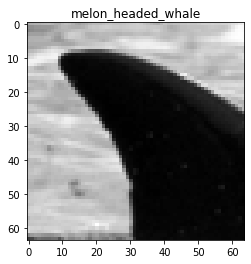

In [322]:
plt.imshow(X_train_64[69].reshape(64, 64), cmap= 'gray')
plt.title(y_train_64[69])

Text(0.5, 1.0, 'melon_headed_whale')

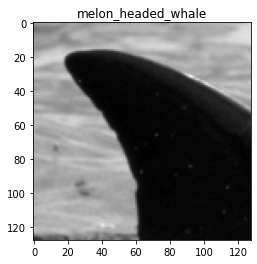

In [323]:
plt.imshow(X_train_128[69].reshape(128, 128), cmap= 'gray')
plt.title(y_train_128[69])

In [324]:
rf_100_64 = RandomForestClassifier(n_estimators = 5, random_state= 42)
rf_100_128 = RandomForestClassifier(n_estimators = 5, random_state= 42)
rf_100_64.fit(X_train_64, y_train_64)
rf_100_128.fit(X_train_128, y_train_128)
rf_100_64.predict(X_test_64)
rf_100_128.predict(X_test_128)
print("64 pixel random forest accuracy: ", rf_100_64.score(X_test_64, y_test_64))
print("128 pixel random forest accuracy: ", rf_100_128.score(X_test_128, y_test_128))

64 pixel random forest accuracy:  0.34
128 pixel random forest accuracy:  0.2866666666666667


In [325]:
knn_100_64 = KNeighborsClassifier()
knn_100_128 = KNeighborsClassifier()
knn_100_64.fit(X_train_64, y_train_64)
knn_100_128.fit(X_train_128, y_train_128)
knn_100_64.predict(X_test_64)
knn_100_128.predict(X_test_128)
print("64 pixel knn accuracy: ", knn_100_64.score(X_test_64, y_test_64))
print("128 pixel knn accuracy: ", knn_100_128.score(X_test_128, y_test_128))

64 pixel knn accuracy:  0.32666666666666666
128 pixel knn accuracy:  0.31333333333333335


In [326]:
svc_100_64 = SVC()
svc_100_128 = SVC()
svc_100_64.fit(X_train_64, y_train_64)
svc_100_128.fit(X_train_128, y_train_128)
svc_100_64.predict(X_test_64)
svc_100_128.predict(X_test_128)
print("64 pixel SVC accuracy: ", svc_100_64.score(X_test_64, y_test_64))
print("128 pixel SVC accuracy: ", svc_100_128.score(X_test_128, y_test_128))

64 pixel SVC accuracy:  0.35333333333333333
128 pixel SVC accuracy:  0.36


In [327]:
#decision tree classifier
dt_clf_64 = DecisionTreeClassifier(random_state = 42)
dt_clf_128 = DecisionTreeClassifier(random_state = 42)
dt_clf_64.fit(X_train_64, y_train_64)
dt_clf_128.fit(X_train_128, y_train_128)
dt_pred_64 = dt_clf_64.predict(X_test_64)
dt_pred_128 = dt_clf_128.predict(X_test_128)
print("\nThe Accuracy Score for Decision Tree Classifier is: ",dt_clf_64.score(X_test_64,y_test_64))
print("\nThe Accuracy Score for Decision Tree Classifier is: ",dt_clf_128.score(X_test_128,y_test_128))


The Accuracy Score for Decision Tree Classifier is:  0.17333333333333334

The Accuracy Score for Decision Tree Classifier is:  0.23333333333333334


In [352]:
ada_clf_64 = AdaBoostClassifier(rf_100_64,n_estimators=100,algorithm="SAMME",learning_rate=0.0015,random_state=42)
ada_clf_128 = AdaBoostClassifier(rf_100_128,n_estimators=100,algorithm="SAMME",learning_rate=0.0015,random_state=42)
ada_clf_64.fit(X_train_64, y_train_64)
ada_clf_128.fit(X_train_128, y_train_128)
adaPred_64 = ada_clf_64.predict(X_test_64)
adaPred_128 = ada_clf_128.predict(X_test_128)
print("\nThe Accuracy Score for AdaBoost Classifier 64 is: ",ada_clf_64.score(X_test_64,y_test_64))
print("\nThe Accuracy Score for AdaBoost Classifier 128 is: ",ada_clf_128.score(X_test_128,y_test_128))


The Accuracy Score for AdaBoost Classifier 64 is:  0.41333333333333333

The Accuracy Score for AdaBoost Classifier 128 is:  0.4066666666666667


In [347]:
km_64 = KMeans(n_clusters=8, n_init=10, max_iter=100000, tol=0.0001, verbose=10, random_state=42, copy_x=True, algorithm='auto')
km_128 = KMeans(n_clusters=8, n_init=10, max_iter=100000, tol=0.0001, verbose=10, random_state=42, copy_x=True, algorithm='auto')
km_64.fit(X_train_64)
km_128.fit(X_train_128)
km_64_pred = km_64.predict(X_test_64)
km_128_pred = km_128.predict(X_test_128)
print("\nThe Accuracy Score for KMM 64 is: ",km_64.score(X_test_64))
print("\nThe Accuracy Score for KMM 128 is: ",km_128.score(X_test_128))

Initialization complete
Iteration 0, inertia 2661551318.0
Iteration 1, inertia 2068933778.574295
Iteration 2, inertia 2008202556.5683405
Iteration 3, inertia 1979854132.5867574
Iteration 4, inertia 1959954978.8477352
Iteration 5, inertia 1948572338.5249283
Iteration 6, inertia 1944300886.4420805
Iteration 7, inertia 1941335294.3634572
Iteration 8, inertia 1939413017.116815
Iteration 9, inertia 1938869187.7443295
Iteration 10, inertia 1938578559.8191302
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2596123837.0
Iteration 1, inertia 2017861286.7353363
Iteration 2, inertia 1967701839.7163687
Iteration 3, inertia 1955290913.9702997
Iteration 4, inertia 1946948462.4677758
Iteration 5, inertia 1941936740.915657
Iteration 6, inertia 1939438725.4157257
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3186269383.0
Iteration 1, inertia 2062551269.804914
Iteration 2, inertia 2009439857.7697713
Iteration 3, ine